<a href="https://www.kaggle.com/code/madushaninimeshika/mnist-nueralnetwork?scriptVersionId=216079098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
## Imports
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

We will import torchvision which contains some utility functions for working with the image data. It also contain helper classes to automatically download and import the famous datasets like MNIST.

MNIST dataset has 60,000 images which can be used to train the model. There is also an additional test set of 10,000 images which can be created by passing train = False to the MNIST class.

# Loading the MNIST dataset

In [ ]:
dataset = MNIST(root='data/', download=True)
print(len(dataset))

In [ ]:
dataset

In [ ]:
image, label = dataset[59999]
plt.imshow(image, cmap='gray')
print('Label : ', label)

These images are small in size, and recognizing the digits can sometimes be hard. PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

PyTorch datasets allow us to specify one or more transformation function which are applied to the images as they are loaded.

torchvision.transforms contains many such predefined functions and we will use ToTensor transform to convert images into Pytorch tensors.
Loading the MNIST data with transformation applied while loadin

In [ ]:
#MNIST Dataset(image and labels)
mnist_dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())
print(mnist_dataset)

In [ ]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

The image is now convert to a 28 X 28 tensor.The first dimension is used to keep track of the color channels. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in that case the color channels would be 3(Red, Green, Blue).


In [ ]:
print(image_tensor[:, 10:15, 10: 15])
print(torch.max(image_tensor), torch.min(image_tensor))

The values range from 0 to 1, with 0 representing black, 1 white and the values between different shades of grey. We can also plot the tensor as an image using lt.imshow

In [ ]:
# Plot the image of the tensor
plt.imshow(image_tensor[0, 10:15, 10:15], cmap='gray')

The image is now convert to a 28 X 28 tensor.The first dimension is used to keep track of the color channels. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in that case the color channels would be 3(Red, Green, Blue).

In [ ]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])

# Print the length of train & validation dataset
print("Length of Train dataset : ", len(train_data))
print("Length of validation dataset : ", len(validation_data))

# Model

These images are small in size, and recognizing the digits can sometimes be hard. PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

PyTorch datasets allow us to specify one or more transformation function which are applied to the images as they are loaded.

torchvision.transforms contains many such predefined functions and we will use ToTensor transform to convert images into Pytorch tensors.

Loading the MNIST data with transformation applied while loading


In [ ]:
x = torch.randn(4, 784)
print(x.shape)

# Training loop

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MnistModel(nn.Module):
    def __init__(self, input_dim=28*28, output_dim=10):
        super(MnistModel, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.network = nn.Sequential(
            nn.Linear(self.input_dim, self.input_dim // 2),
            nn.ReLU(),
            nn.Linear(self.input_dim // 2, self.input_dim // 4),
            nn.ReLU(),
            nn.Linear(self.input_dim // 4, self.input_dim // 8),
            nn.ReLU(),
            nn.Linear(self.input_dim // 8, self.input_dim // 16),
            nn.ReLU(),
            nn.Linear(self.input_dim // 16, self.output_dim)
        )

    def forward(self, x):
        return self.network(x)

# Hyperparameters
input_dim = 28 * 28
output_dim = 10
train_batch_size = 128
val_batch_size = 64
epochs = 100

# Initialize model, loss function, and optimizer
model = MnistModel(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Move model to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop

# Data Loaders
train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(validation_data, batch_size=val_batch_size, shuffle=False)

for epoch in range(epochs):
    model.train()  # Set model to train mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Flatten images into vectors of shape (batch_size, input_dim)
        images = images.view(images.size(0), -1).to(device)  # Flatten input
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels) # Compute loss

        # Backward pass and optimization
        optimizer.zero_grad() # Clear previous gradients
        loss.backward() # Perform backward pass
        optimizer.step() # Update parameters

        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')


# Evaluate the model
Use the validation dataset toevaluate the model

Compute the metrix like accuracy score

In [ ]:
x = torch.randn(1, 784, device=device)
print(x.shape)

In [ ]:
pred = model(x)

In [ ]:
pred.argmax(1) == 1

In [ ]:
pred

In [ ]:
pred

# Evaluate the model
Use the validation dataset toevaluate the model


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

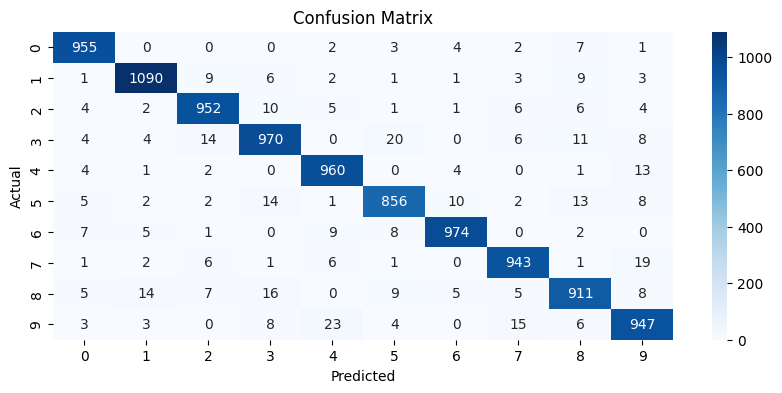

Accuracy : 
0.9558
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       974
           1       0.97      0.97      0.97      1125
           2       0.96      0.96      0.96       991
           3       0.95      0.94      0.94      1037
           4       0.95      0.97      0.96       985
           5       0.95      0.94      0.94       913
           6       0.97      0.97      0.97      1006
           7       0.96      0.96      0.96       980
           8       0.94      0.93      0.94       980
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [64]:
def Model_evaluation(model, val_loader, device):
    model.eval() # Set the model to evaluation mode
    all_labels = []
    all_preds = []

    with torch.no_grad(): # Disable gradient computation for evaluation
        for images, labels in val_loader:
            # Flatten images and move to device
            images = images.view(images.size(0), -1).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Get predictions
            _, predicted = torch.max(outputs, 1) # (argmax returns index of max logit)
    
            #Collect all labels and predictions
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    accuracy = accuracy_score(all_labels, all_preds)
    print("Accuracy : ")
    print(accuracy)

    report = classification_report(all_labels, all_preds)
    print("Classification Report : ")
    print(report)

    return cm, accuracy, report
    
# Call the evaluation function
cm, accuracy, report = Model_evaluation(model, val_loader, device)
    